In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:

root = "./"
imglabel_map = os.path.join(root, 'imagelabels.mat')
setid_map = os.path.join(root, 'setid.mat')
imagelabels = sio.loadmat(imglabel_map)['labels'][0]
setids = sio.loadmat(setid_map)
ids = np.concatenate([setids['trnid'][0], setids['valid'][0],setids['tstid'][0]])
labels = []
image_path = []
for i in ids:
    labels.append(int(imagelabels[i-1])-1)
    image_path.append( os.path.join(root, 'jpg', 'image_{:05d}.jpg'.format(i)))

df = pd.DataFrame({'filename':image_path, 'label':labels})
df.label=df.label.astype(str)


In [47]:
c= df.sample(1)

Found 1 validated image filenames belonging to 1 classes.
(256, 3)
(256, 3)
(256, 3)


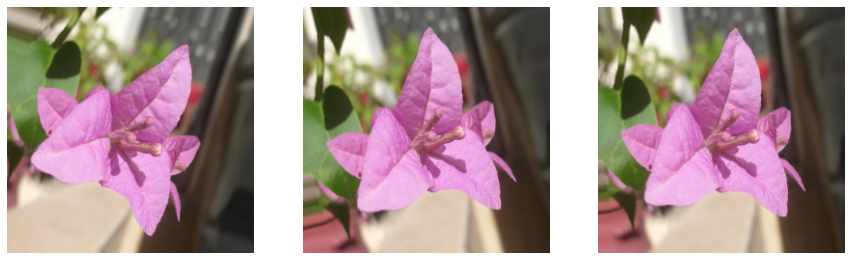

In [48]:
# ImageDataGenerator rotation
from matplotlib import pyplot as plt
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# iterator
aug_iter = datagen.flow_from_dataframe(
    c,
    directory='./',
    x_col='filename',
    y_col='label',
    class_mode='categorical'
)
# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    image=image[0]
    print(image[0].shape)
    ax[i].imshow(image)
    ax[i].axis('off')

Found 1 validated image filenames belonging to 1 classes.
(256, 3)
(256, 3)
(256, 3)


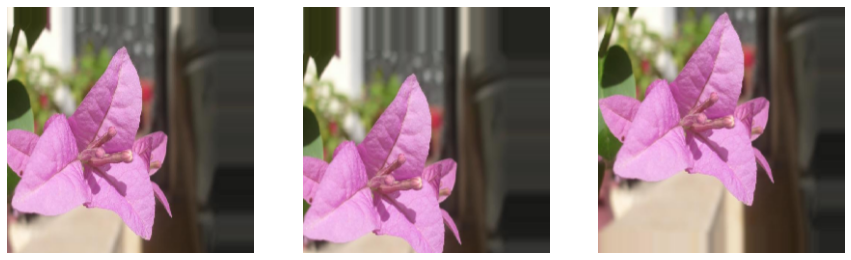

In [49]:
# ImageDataGenerator rotation
from matplotlib import pyplot as plt
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# iterator
aug_iter = datagen.flow_from_dataframe(
    c,
    directory='./',
    x_col='filename',
    y_col='label',
    class_mode='categorical'
)
# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    image=image[0]
    print(image[0].shape)
    ax[i].imshow(image)
    ax[i].axis('off')

Found 1 validated image filenames belonging to 1 classes.


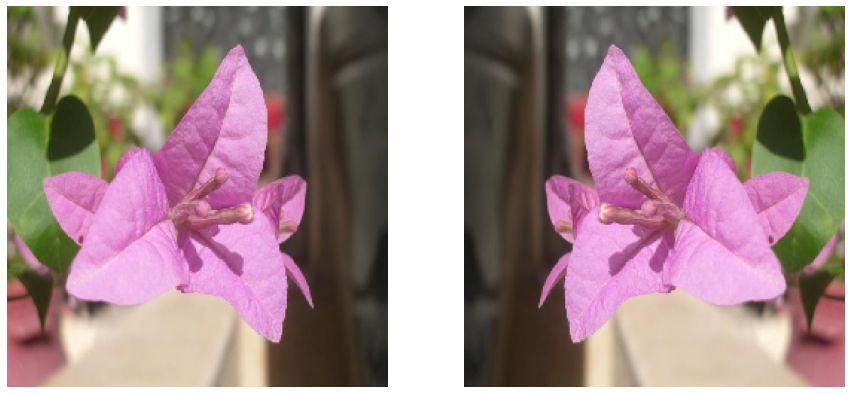

In [54]:
# ImageDataGenerator rotation
from matplotlib import pyplot as plt
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow_from_dataframe(
    c,
    directory='./',
    x_col='filename',
    y_col='label',
    class_mode='categorical'
)# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))

# generate batch of images
for i in range(2):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')